### [NASA API](https://api.nasa.gov/)

Napisz program w Pythonie, który pobierze zdjęcie astronomiczne dnia z API NASA APOD (Astronomy Picture of the Day). Program powinien:

1. Umożliwić użytkownikowi podanie daty.
2. Wysłać żądanie GET do API NASA APOD z JSON-em zawierającym datę.
3. Otrzymać odpowiedź z API w formacie JSON.
4. Wyświetlić tytuł, opis oraz zdjęcie astronomiczne dnia.

Podaj datę w formacie RRRR-MM-DD (np. 2024-05-31):  2024-10-27


Tytuł: LDN 43: The Cosmic Bat Nebula
Opis: What is the most spook-tacular nebula in the galaxy?   One contender is LDN 43, which bears an astonishing resemblance to a vast cosmic bat flying amongst the stars on a dark Halloween night.  Located about 1400 light years away in the constellation Ophiuchus, this molecular cloud is dense enough to block light not only from background stars, but from wisps of gas lit up by the nearby reflection nebula LBN 7.  Far from being a harbinger of death, this 12-light year-long filament of gas and dust is actually a stellar nursery.  Glowing with eerie light, the bat is lit up from inside by dense gaseous knots that have just formed young stars.    Your Sky Surprise: What picture did APOD feature on your birthday? (post 1995)


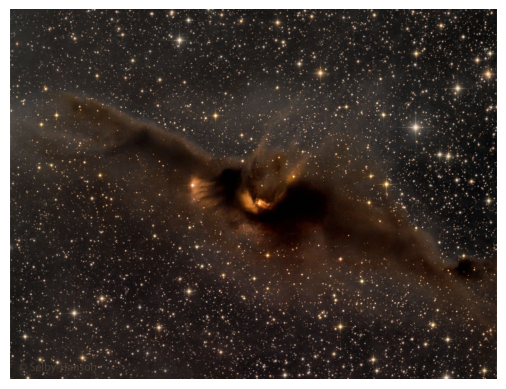

In [1]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Pobranie daty od użytkownika
data = input("Podaj datę w formacie RRRR-MM-DD (np. 2024-05-31): ")

# URL do API NASA APOD
url = "https://api.nasa.gov/planetary/apod"
    
# Parametry żądania (bez klucza API)
params = {
    "date": data,
    "api_key": "DEMO_KEY"  # NASA APOD oferuje demo klucz "DEMO_KEY"
}
    
# Wysłanie żądania GET do API
response = requests.get(url, params=params)
    
# Sprawdzenie statusu odpowiedzi
if response.status_code == 200:
    # Parsowanie danych JSON
    data = response.json()
else:
    print(f"Błąd: Nie udało się pobrać danych (status code: {response.status_code})")

# Wyświetlanie tytułu i opisu
print(f"Tytuł: {data['title']}")
print(f"Opis: {data['explanation']}")
    
# Pobieranie i wyświetlanie obrazu
response = requests.get(data['url'])
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis('off')  # Ukryj osie
plt.show()